In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
asset = 'ADA' 
freq = '5min'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('min')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading ADA from ../dataset/ADA_5min.csv
ADA: 3367 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:38:00+00:00,2021-04-07 11:37:59.055697+00:00,1.172550,0.000900,330639.048591,500585.424671,-0.000384,-0.000469,-0.000810,-0.000981,-0.001066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:43:00+00:00,2021-04-07 11:42:59.055697+00:00,1.183900,0.001400,264189.090154,139303.543714,-0.000591,-0.000676,-0.000929,-0.001098,-0.001183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:48:00+00:00,2021-04-07 11:47:59.055697+00:00,1.178300,0.001400,230631.852305,226685.612231,-0.000594,-0.000764,-0.000849,-0.000934,-0.001018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [4]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [5]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 129735 total (24.859%)


But there are a lot of Zero values

In [6]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 3 total (0.001%)


asks_notional_0    2
bids_notional_0    1
system_time        0
midpoint           0
spread             0
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [7]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 93126 total (92.195%)


bids_market_notional_13    3318
bids_market_notional_14    3313
bids_market_notional_12    3308
bids_market_notional_10    3305
asks_market_notional_14    3300
bids_market_notional_11    3298
bids_market_notional_9     3294
bids_market_notional_8     3288
bids_market_notional_7     3287
asks_market_notional_13    3283
asks_market_notional_12    3280
bids_market_notional_5     3273
bids_market_notional_6     3260
bids_market_notional_4     3238
asks_market_notional_10    3238
asks_market_notional_11    3236
bids_market_notional_3     3217
asks_market_notional_9     3217
asks_market_notional_8     3193
asks_market_notional_7     3188
bids_market_notional_2     3138
asks_market_notional_6     3134
asks_market_notional_5     3127
asks_market_notional_4     3048
bids_market_notional_1     3045
asks_market_notional_3     2948
asks_market_notional_2     2859
asks_market_notional_1     2556
bids_market_notional_0     2355
asks_market_notional_0     1582
dtype: int64

In [8]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 36528 total (36.163%)


bids_cancel_notional_0     2126
asks_cancel_notional_0     1885
bids_cancel_notional_1     1464
asks_cancel_notional_14    1380
asks_cancel_notional_13    1333
asks_cancel_notional_1     1333
bids_cancel_notional_3     1316
asks_cancel_notional_12    1300
bids_cancel_notional_4     1284
bids_cancel_notional_2     1271
bids_cancel_notional_5     1238
asks_cancel_notional_11    1211
asks_cancel_notional_10    1211
asks_cancel_notional_8     1192
asks_cancel_notional_7     1183
asks_cancel_notional_9     1165
asks_cancel_notional_6     1161
asks_cancel_notional_2     1129
asks_cancel_notional_4     1114
asks_cancel_notional_5     1105
bids_cancel_notional_7     1091
bids_cancel_notional_6     1080
asks_cancel_notional_3     1075
bids_cancel_notional_8     1025
bids_cancel_notional_14    1017
bids_cancel_notional_9     1011
bids_cancel_notional_12     969
bids_cancel_notional_13     963
bids_cancel_notional_11     955
bids_cancel_notional_10     941
dtype: int64

In [9]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 78 total (0.077%)


asks_limit_notional_14    25
asks_limit_notional_13    15
asks_limit_notional_12    10
asks_limit_notional_11    10
asks_limit_notional_10     6
asks_limit_notional_9      4
asks_limit_notional_8      3
bids_limit_notional_4      1
bids_limit_notional_11     1
bids_limit_notional_13     1
bids_limit_notional_14     1
asks_limit_notional_3      1
asks_limit_notional_2      0
asks_limit_notional_7      0
asks_limit_notional_6      0
asks_limit_notional_5      0
asks_limit_notional_4      0
bids_limit_notional_0      0
asks_limit_notional_1      0
bids_limit_notional_1      0
bids_limit_notional_12     0
bids_limit_notional_10     0
bids_limit_notional_9      0
bids_limit_notional_8      0
bids_limit_notional_7      0
bids_limit_notional_6      0
bids_limit_notional_5      0
bids_limit_notional_3      0
bids_limit_notional_2      0
asks_limit_notional_0      0
dtype: int64

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include just a few zero values.

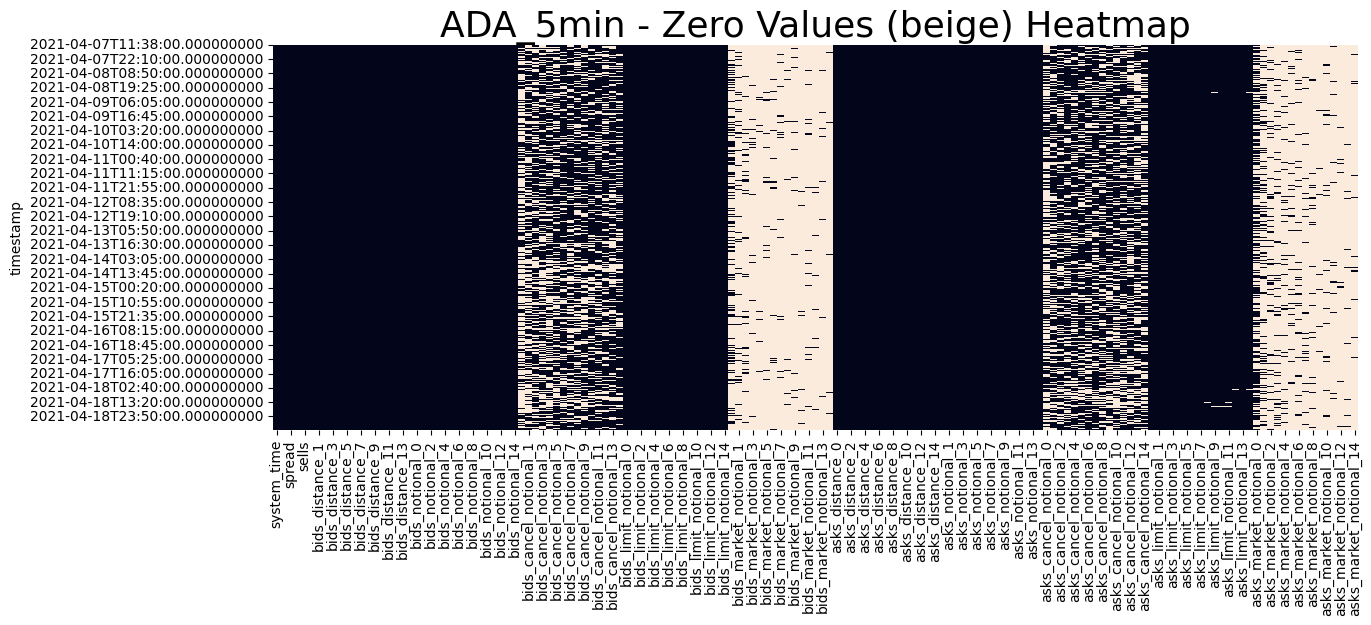

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

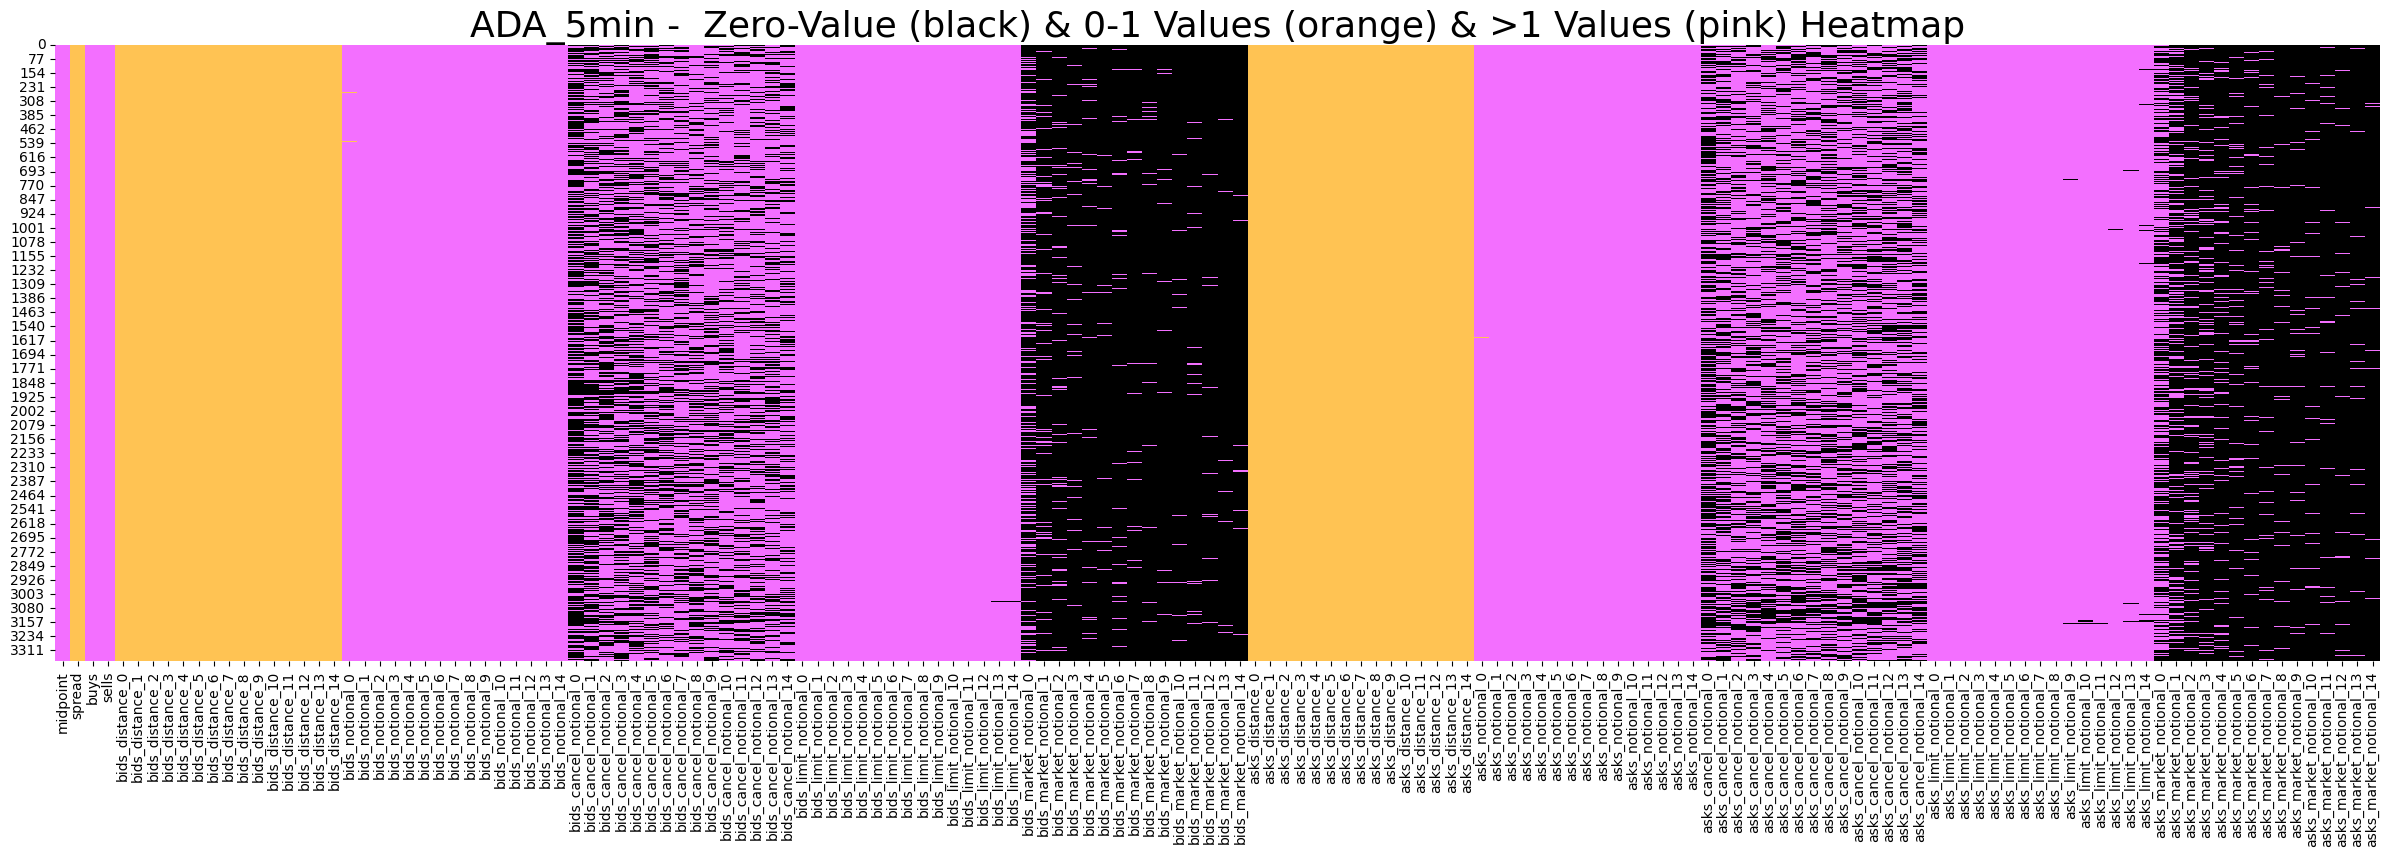

In [11]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [12]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,3367.000000,1.315086,0.102222,1.136350,1.214750,1.299500,1.415900,1.557050
spread,3367.000000,0.000672,0.000668,0.000100,0.000400,0.000600,0.000800,0.015300
buys,3367.000000,223171.167704,211068.635349,10963.099099,92473.194357,162889.169679,277092.915059,2763143.499501
sells,3367.000000,184121.287872,231200.717742,2458.606378,58930.158226,116841.705367,220164.495855,3791985.497727
bids_distance_0,3367.000000,-0.000255,0.000257,-0.005536,-0.000306,-0.000211,-0.000140,-0.000033
bids_distance_1,3367.000000,-0.000397,0.000300,-0.007272,-0.000443,-0.000344,-0.000270,-0.000101
bids_distance_2,3367.000000,-0.000533,0.000343,-0.008575,-0.000585,-0.000465,-0.000379,-0.000168
bids_distance_3,3367.000000,-0.000663,0.000375,-0.008647,-0.000733,-0.000591,-0.000496,-0.000235
bids_distance_4,3367.000000,-0.000792,0.000401,-0.009081,-0.000871,-0.000724,-0.000613,-0.000324
bids_distance_5,3367.000000,-0.000921,0.000525,-0.017113,-0.000990,-0.000855,-0.000728,-0.000396


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

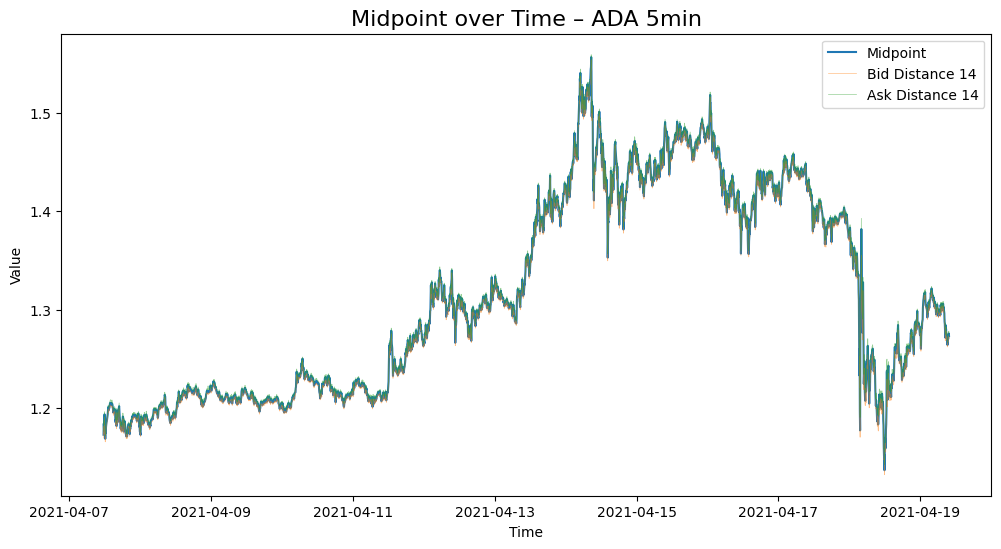

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

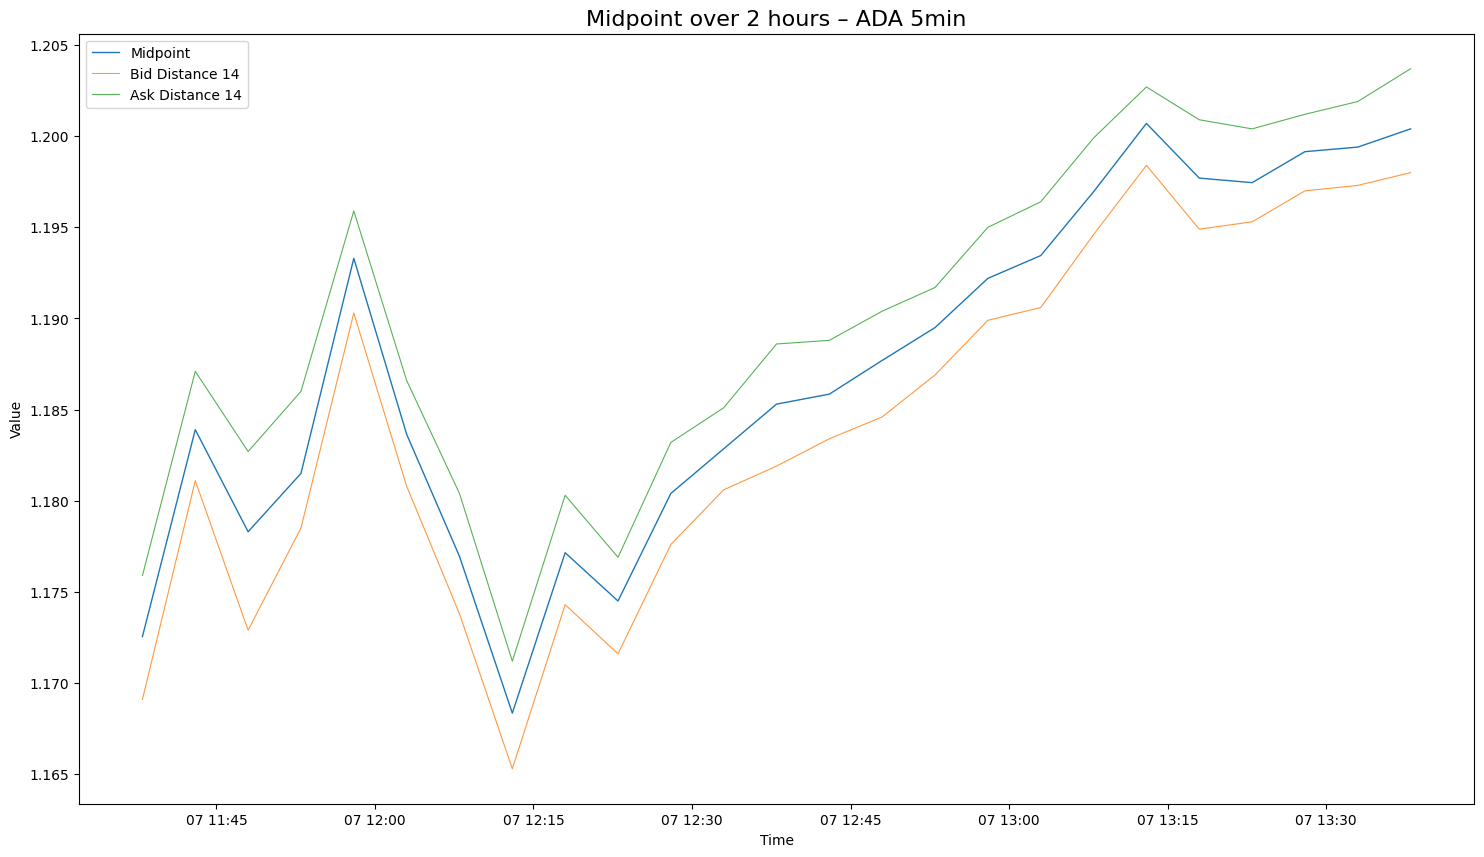

In [14]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [15]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
system_time,2021-04-07 11:37:59.055697+00:00,2021-04-07 11:42:59.055697+00:00,2021-04-07 11:47:59.055697+00:00
midpoint,1.17255,1.1839,1.1783
spread,0.0009,0.0014,0.0014
buys,330639.048591,264189.090154,230631.852305
sells,500585.424671,139303.543714,226685.612231
bids_distance_0,-0.000384,-0.000591,-0.000594
bids_distance_1,-0.000469,-0.000676,-0.000764
bids_distance_2,-0.00081,-0.000929,-0.000849
bids_distance_3,-0.000981,-0.001098,-0.000934
bids_distance_4,-0.001066,-0.001183,-0.001018


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [16]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
bids_distance_0,-0.000384,-0.000591,-0.000594
bids_notional_0,2461.409912,5481.839844,383.899994
bids_cancel_notional_0,0.0,0.0,2912.199951
bids_limit_notional_0,2461.409912,5481.839844,3296.100098
bids_market_notional_0,0.0,0.0,0.0
asks_distance_0,0.000384,0.000591,0.000594
asks_notional_0,1993.089966,5501.47998,589.5
asks_cancel_notional_0,7389.899902,18087.109375,0.0
asks_limit_notional_0,9392.610352,23697.009766,589.5
asks_market_notional_0,9.62,108.410004,0.0


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [17]:
print(f'{asset} {freq} shape:', df.shape)

ADA 5min shape: (3367, 155)


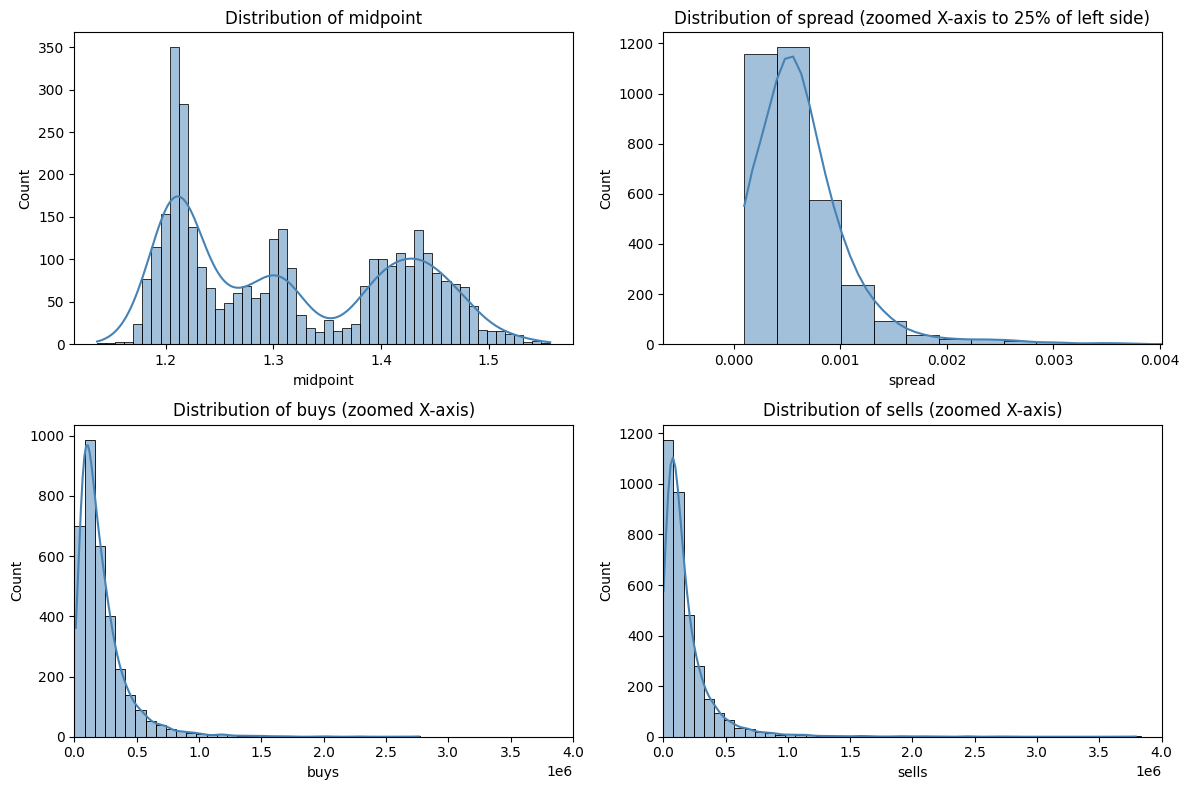

In [18]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=4*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

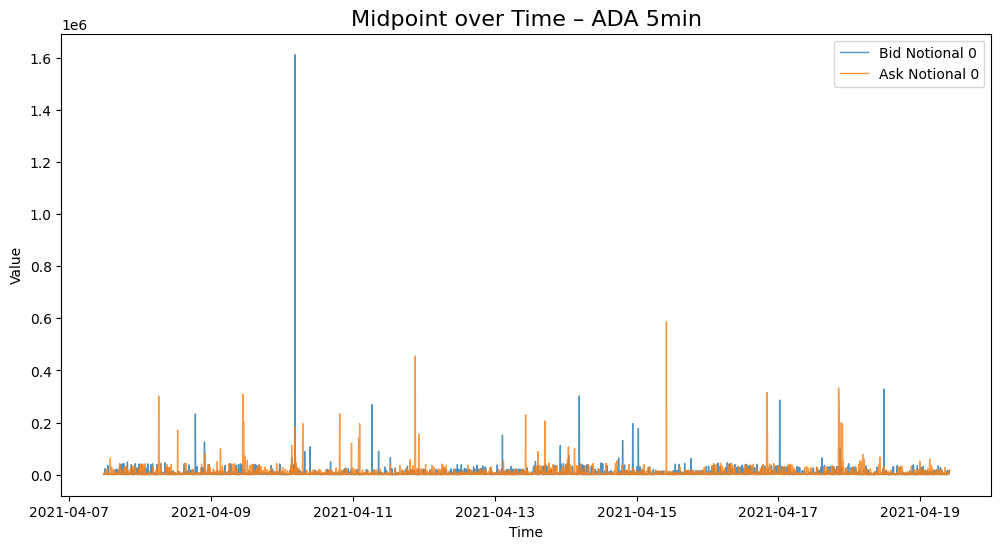

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – {} {}'.format(asset, freq), fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are some observations of with extreme large values of Bid/Ask notional volumes.

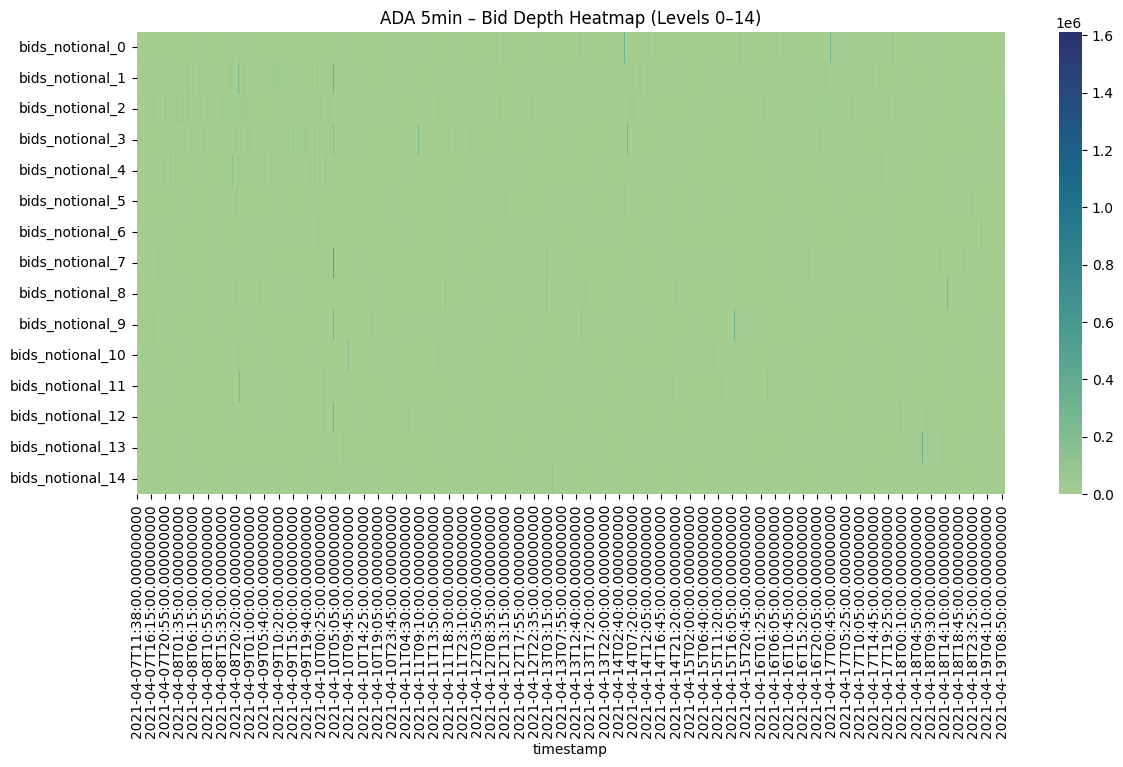

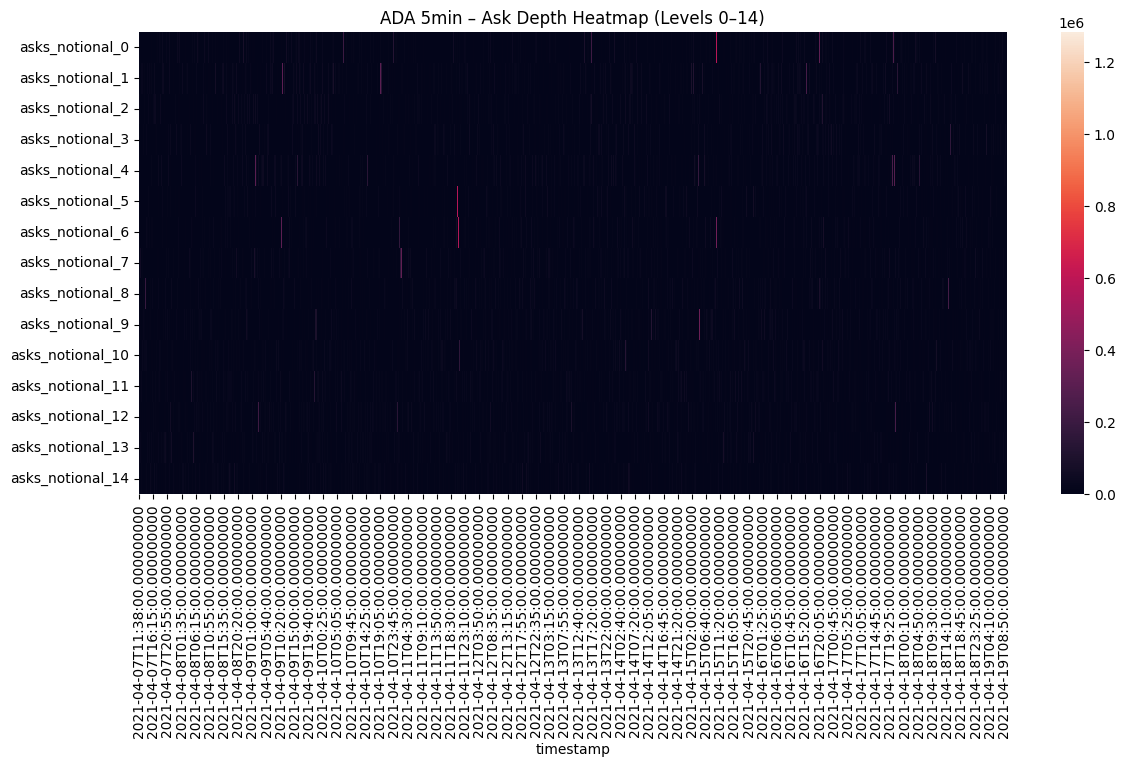

In [20]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14)')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14)')
plt.show()


There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

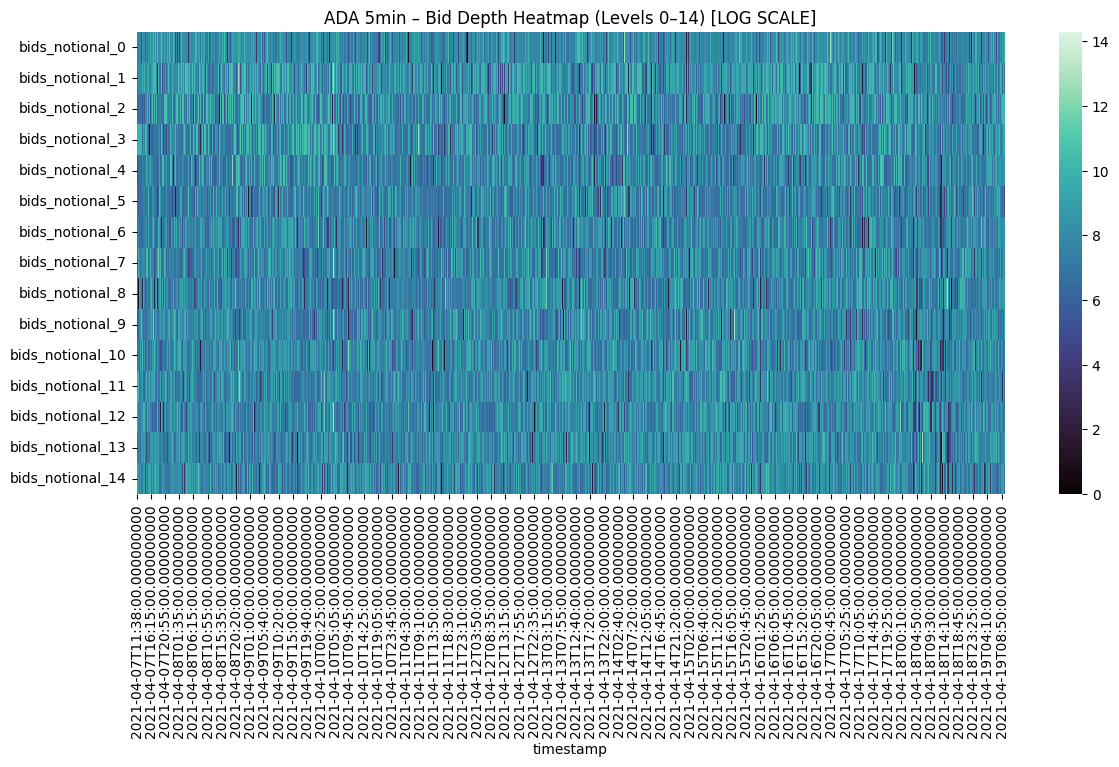

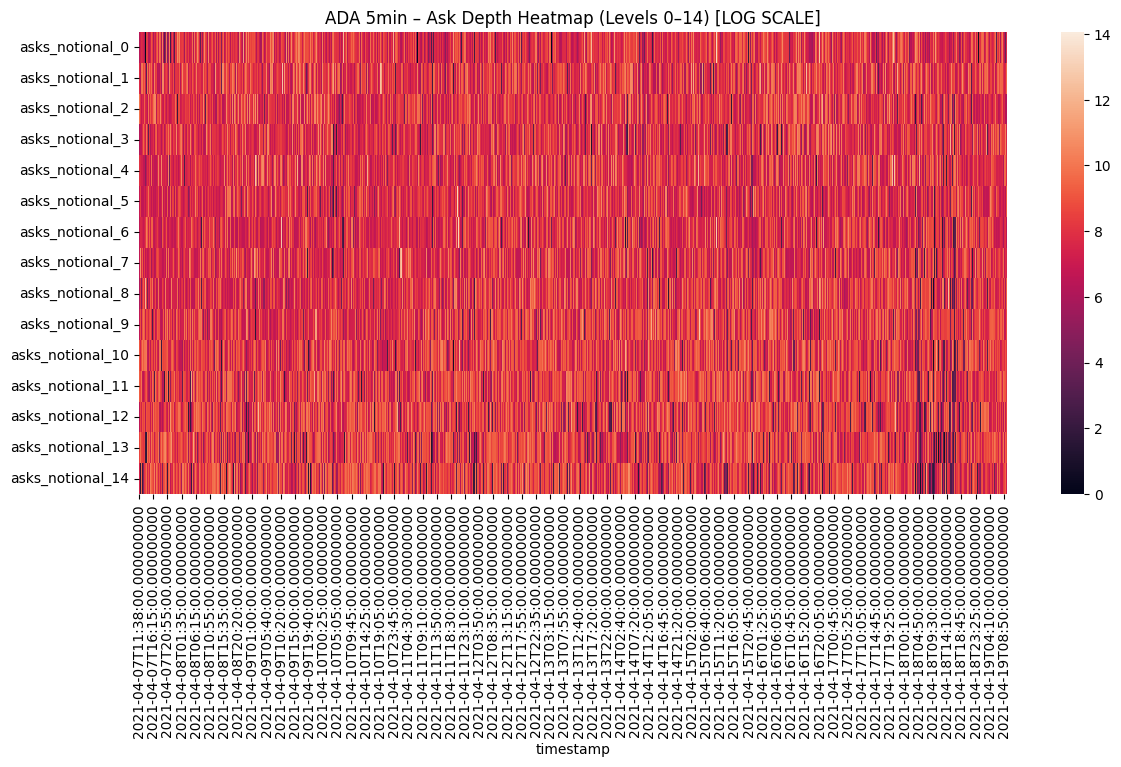

In [21]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

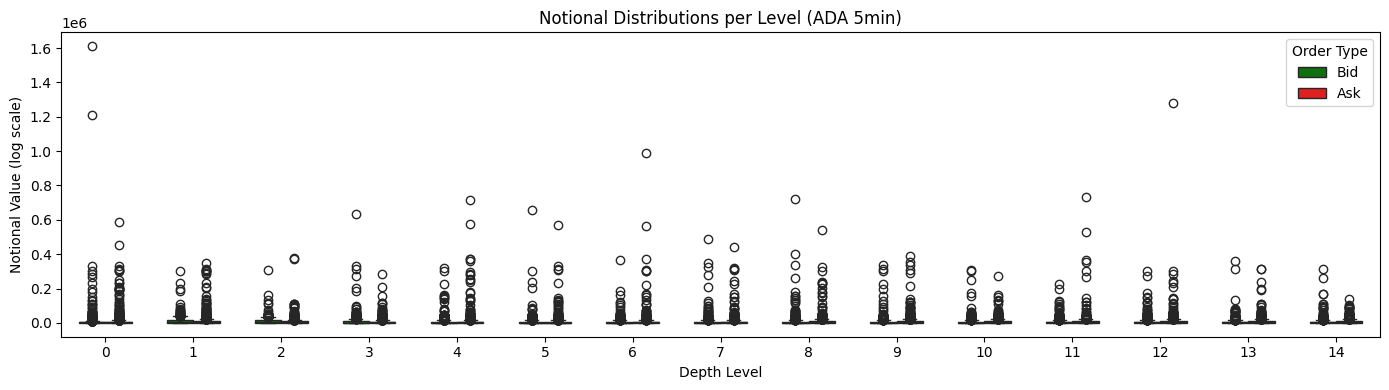

In [22]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level ({} {})'.format(asset, freq))
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

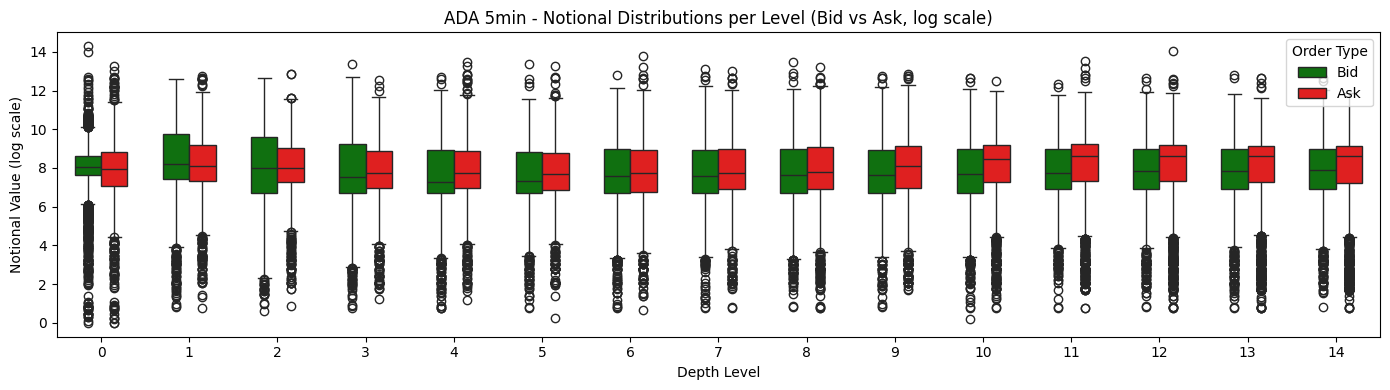

In [23]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

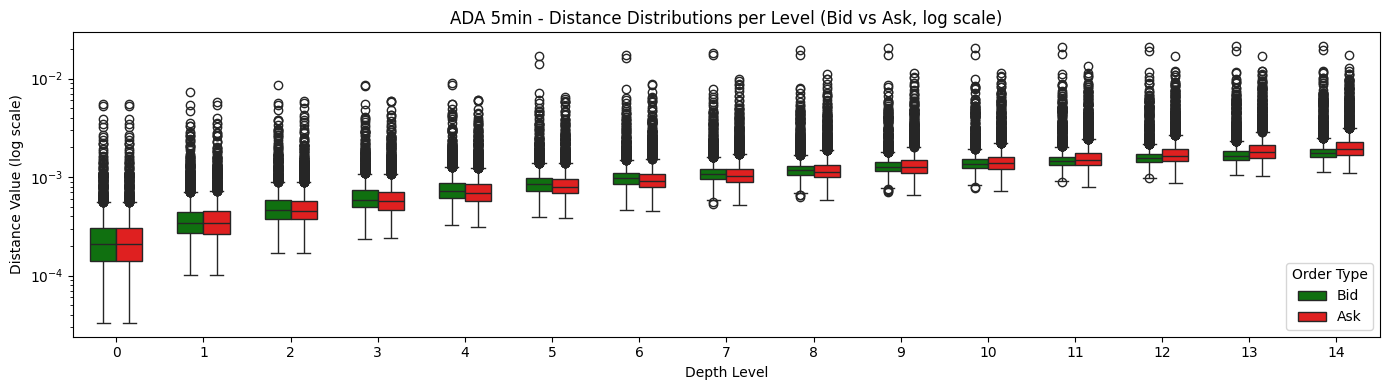

In [24]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

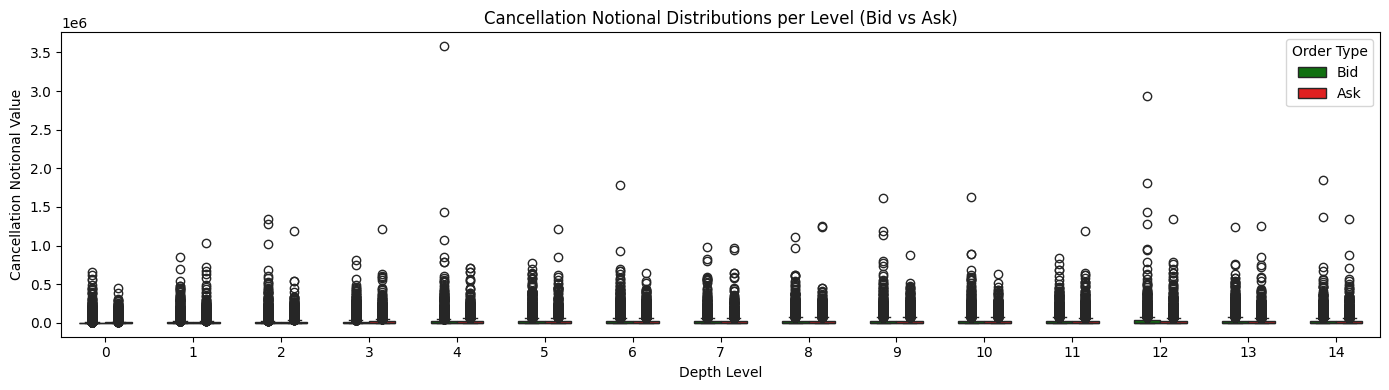

In [25]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

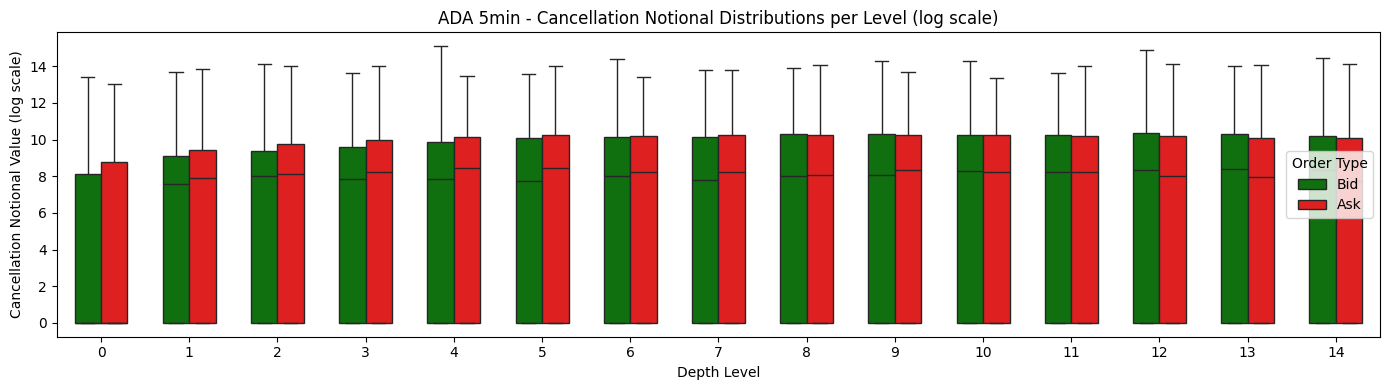

In [26]:
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, therefore for all distributions the medioan is 0.

### Limit Volume

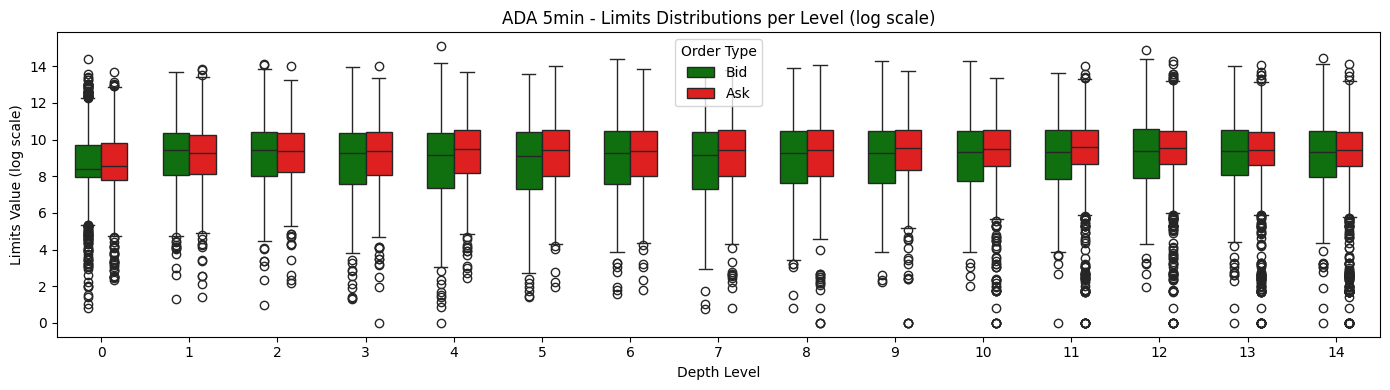

In [27]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

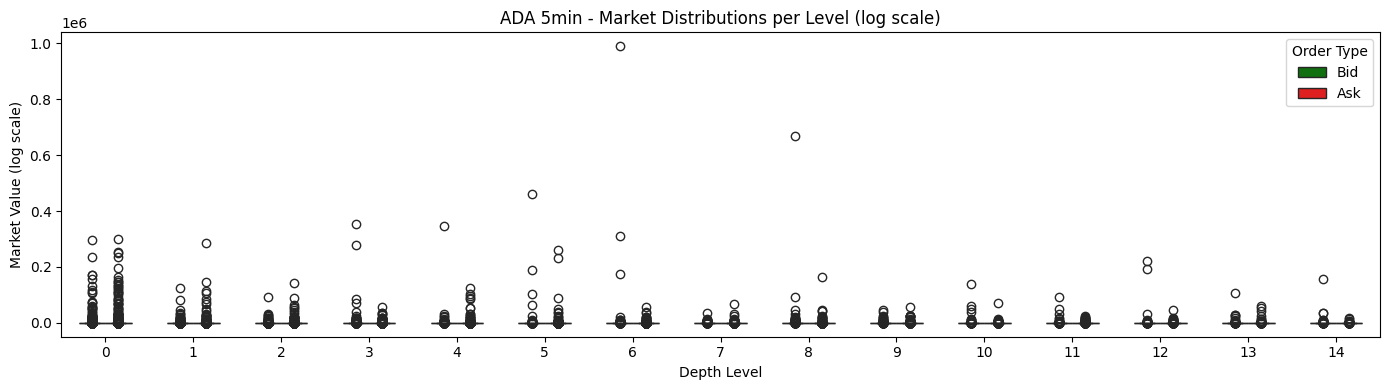

In [28]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [29]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
5537,0,Ask,298712.06250
22303,3,Bid,354866.15625
29039,4,Bid,344923.21875
36744,5,Bid,460534.96875
41992,6,Bid,989294.81250
43275,6,Bid,312124.65625
55965,8,Bid,668526.50000


There are some outliers standing out from the general scope.

In [30]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value']*0.30)]


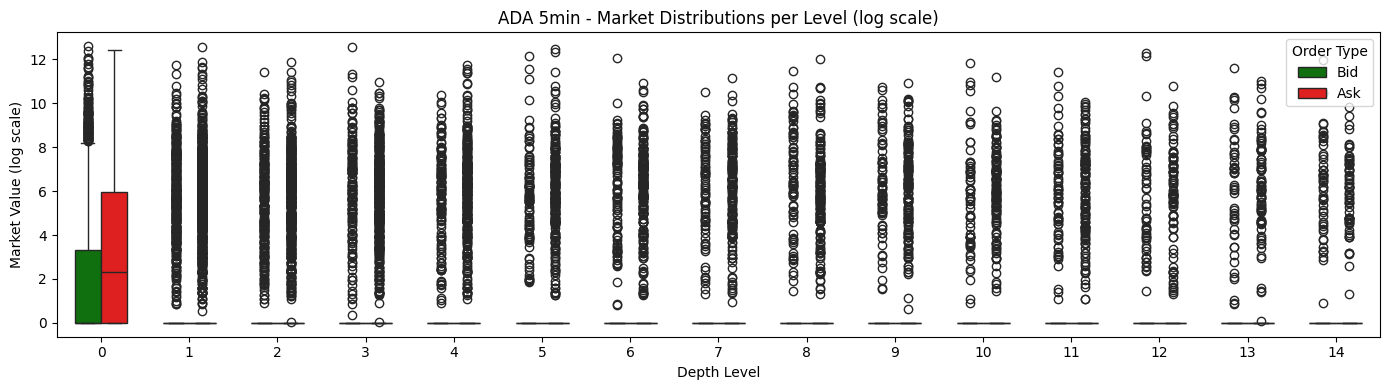

In [31]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

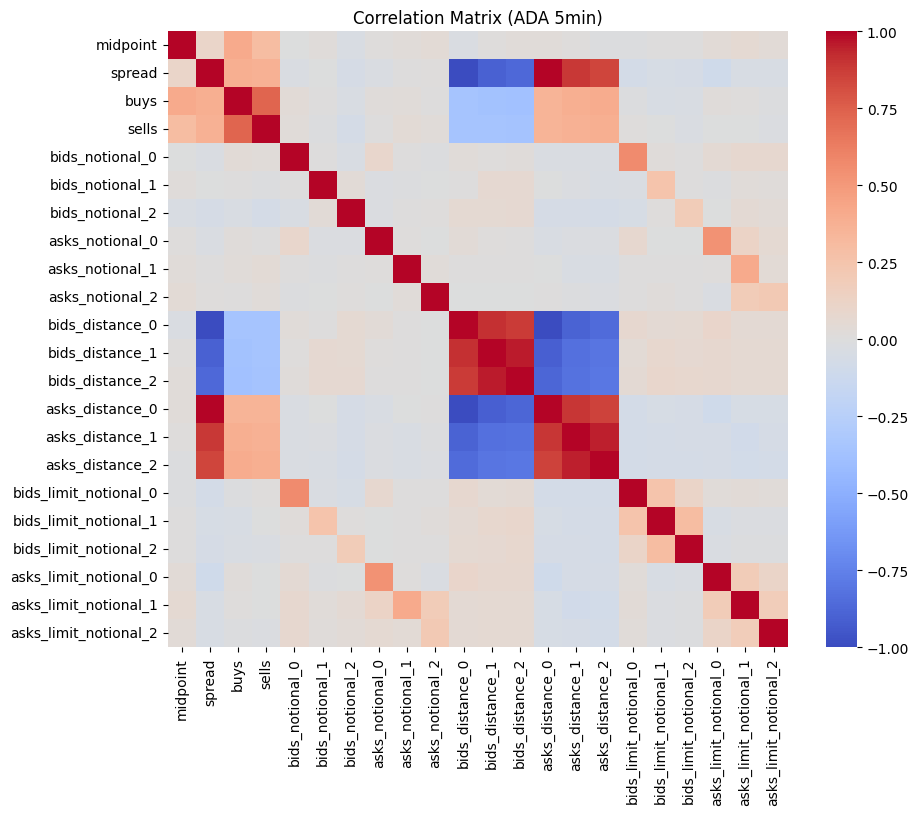

In [32]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.